In [32]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Read Data

In [4]:
datapath = "dataset/"

df = pd.read_csv(datapath + 'FIFAallMatchBoxData.csv')

In [5]:
df.head()

,year,hname,aname,hgoals,agoals,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,ashots,hyellowCards,ayellowCards,hredCards,aredCards,hfouls,afouls,hsaves,asaves
0,2012,Mexico,Costa Rica,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0
1,2012,Antigua and Barbuda,United States,1,2,24,76,2,4,14,17,1,1,0,0,11,13,2,1
2,2012,United States,Guatemala,3,1,80,20,3,1,5,2,0,0,0,0,1,3,0,1
3,2013,Honduras,United States,2,1,57,43,4,2,12,11,0,0,0,0,10,12,1,2
4,2013,Panama,Costa Rica,2,2,47,53,5,3,13,11,1,1,0,0,7,10,1,3


In [6]:
df.shape

(1482, 19)

# Set label for each record
### 1 = home win, 2 = away win, 0 = draw

In [ ]:
df['label'] = df.apply(
    lambda x: 1 if x['hgoals'] > x['agoals'] else (2 if x['hgoals'] < x['agoals'] else 0),
    axis=1
)

df.head()

,year,hname,aname,hgoals,agoals,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,ashots,hyellowCards,ayellowCards,hredCards,aredCards,hfouls,afouls,hsaves,asaves,label
0,2012,Mexico,Costa Rica,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,1
1,2012,Antigua and Barbuda,United States,1,2,24,76,2,4,14,17,1,1,0,0,11,13,2,1,2
2,2012,United States,Guatemala,3,1,80,20,3,1,5,2,0,0,0,0,1,3,0,1,1
3,2013,Honduras,United States,2,1,57,43,4,2,12,11,0,0,0,0,10,12,1,2,1
4,2013,Panama,Costa Rica,2,2,47,53,5,3,13,11,1,1,0,0,7,10,1,3,0


# Select Columns

In [8]:
df.columns

Index(['year', 'hname', 'aname', 'hgoals', 'agoals', 'hPossesion',
       'aPossesion', 'hshotsOnTarget', 'ashotsOnTarget', 'hshots', 'ashots',
       'hyellowCards', 'ayellowCards', 'hredCards', 'aredCards', 'hfouls',
       'afouls', 'hsaves', 'asaves', 'label'],
      dtype='object')

In [9]:
use_columns = ['hPossesion','aPossesion', 'hshotsOnTarget', 'ashotsOnTarget', 
               'hshots', 'ashots','hfouls','afouls', 'hsaves', 'asaves', 'label']

df = df[use_columns]
df.head()

,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,ashots,hfouls,afouls,hsaves,asaves,label
0,0,0,0,0,0,0,0,0,0,0,1
1,24,76,2,4,14,17,11,13,2,1,2
2,80,20,3,1,5,2,1,3,0,1,1
3,57,43,4,2,12,11,10,12,1,2,1
4,47,53,5,3,13,11,7,10,1,3,0


In [11]:
# drop invalid records

df = df.dropna()
df = df[df['hPossesion'] > 0]
df = df[df['aPossesion'] > 0]
df.head()

,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,ashots,hfouls,afouls,hsaves,asaves,label
1,24,76,2,4,14,17,11,13,2,1,2
2,80,20,3,1,5,2,1,3,0,1,1
3,57,43,4,2,12,11,10,12,1,2,1
4,47,53,5,3,13,11,7,10,1,3,0
5,72,28,5,4,21,6,8,13,4,5,0


# Data Inspection

In [15]:
df.describe()

,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,ashots,hfouls,afouls,hsaves,asaves,label
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,52.084906,47.911950,5.067610,4.047956,13.157233,10.706761,13.556604,13.596698,2.981132,3.672170,1.107704
std,13.099055,13.101676,3.328605,3.002238,6.559691,5.778335,4.988415,4.953133,2.338328,2.615137,0.730500
min,15.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,39.000000,3.000000,2.000000,9.000000,7.000000,10.000000,10.000000,1.000000,2.000000,1.000000
50%,52.000000,48.000000,5.000000,3.000000,12.000000,10.000000,13.000000,13.000000,3.000000,3.000000,1.000000
75%,61.000000,56.000000,7.000000,6.000000,17.000000,14.000000,17.000000,17.000000,4.000000,5.000000,2.000000
max,86.000000,85.000000,26.000000,19.000000,40.000000,44.000000,31.000000,30.000000,17.000000,15.000000,2.000000


In [14]:
df.mean()

hPossesion        52.084906
aPossesion        47.911950
hshotsOnTarget     5.067610
ashotsOnTarget     4.047956
hshots            13.157233
ashots            10.706761
hfouls            13.556604
afouls            13.596698
hsaves             2.981132
asaves             3.672170
label              1.107704
dtype: float64

In [16]:
df.max()

hPossesion        86
aPossesion        85
hshotsOnTarget    26
ashotsOnTarget    19
hshots            40
ashots            44
hfouls            31
afouls            30
hsaves            17
asaves            15
label              2
dtype: int64

In [17]:
df.min()

hPossesion        15
aPossesion        14
hshotsOnTarget     0
ashotsOnTarget     0
hshots             0
ashots             0
hfouls             1
afouls             0
hsaves             0
asaves             0
label              0
dtype: int64

# Visualizing Data

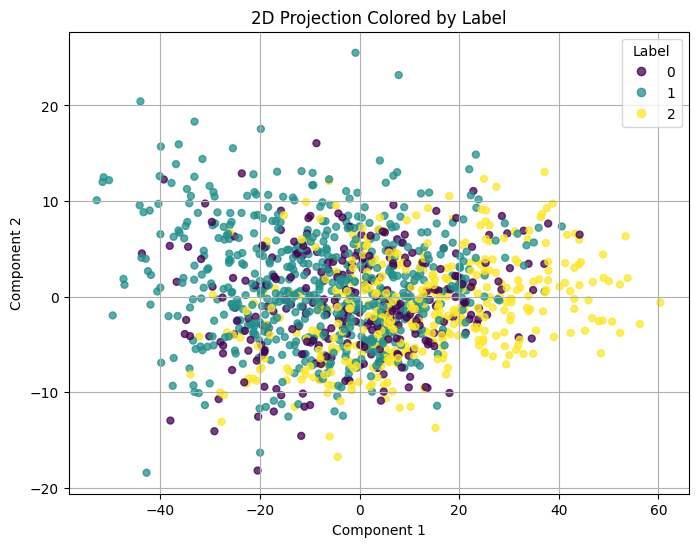

In [38]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df)

# Assume labels = [0, 1, 2] and sizes = a constant or from a feature column
labels = np.array(df['label'])  # Replace y with your label column
sizes = np.full(len(df), 25)  # Or use a feature: X[:, feature_index] * scale_factor

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, s=sizes, cmap='viridis', alpha=0.75)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Projection Colored by Label')
plt.legend(*scatter.legend_elements(), title="Label")
plt.grid(True)
plt.show()


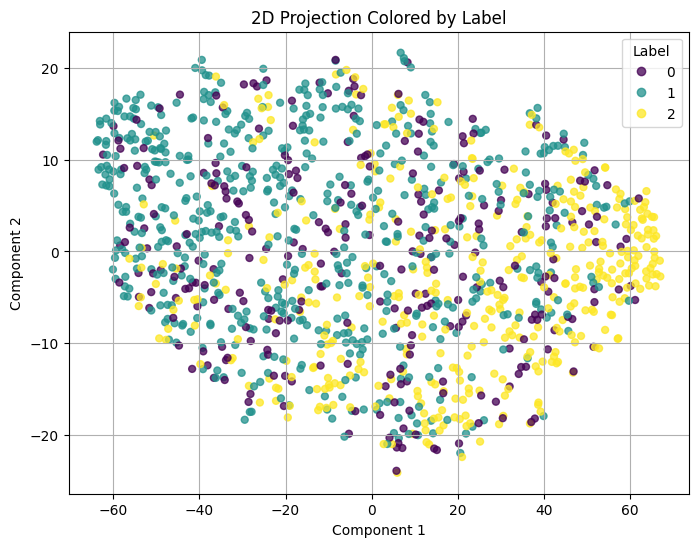

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
data_2d = tsne.fit_transform(df)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, s=sizes, cmap='viridis', alpha=0.75)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Projection Colored by Label')
plt.legend(*scatter.legend_elements(), title="Label")
plt.grid(True)
plt.show()

c:\Users\Public\Anaconda\envs\dsde-cp\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


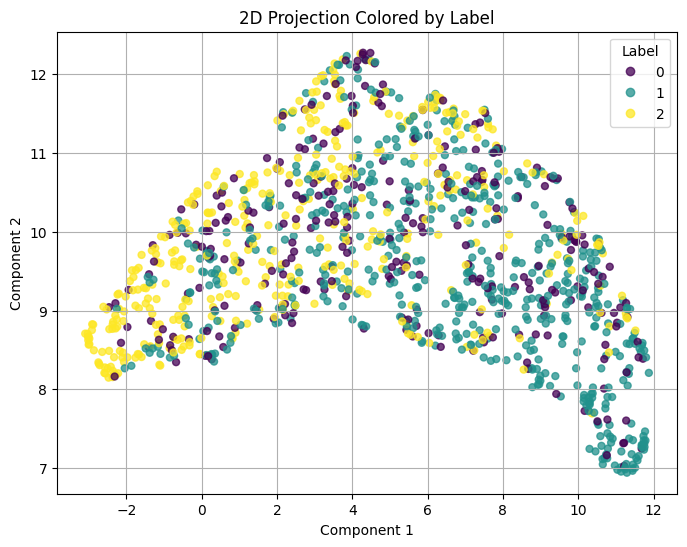

In [40]:
import umap.umap_ as umap

reducer = umap.UMAP(n_components=2)
data_2d = reducer.fit_transform(df)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, s=sizes, cmap='viridis', alpha=0.75)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Projection Colored by Label')
plt.legend(*scatter.legend_elements(), title="Label")
plt.grid(True)
plt.show()


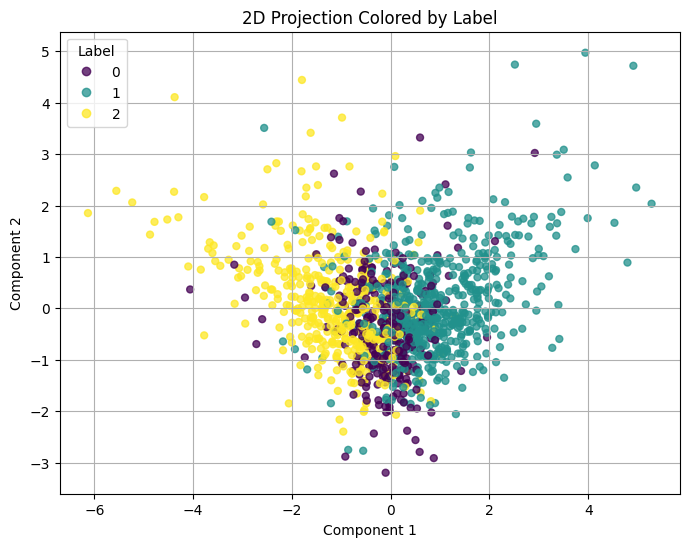

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
data_2d = lda.fit_transform(df, df['label'])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, s=sizes, cmap='viridis', alpha=0.75)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Projection Colored by Label')
plt.legend(*scatter.legend_elements(), title="Label")
plt.grid(True)
plt.show()


# Save Data

In [18]:
df.to_csv(datapath + 'data.csv', index=False)